# **Trabajo Final del curso Aplicaciones de Data Science**

Sección: CC73

Elaborado por:

*   Andrea Fabiana García Napurí - u202014068
*   Claudia Letizia Sifuentes Mendieta - u20211a147


## Descarga del dataset: “Eye Diseases Classification”
disponible en el siguiente enlace: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification

In [3]:
!gdown --id 1kLuS2MHwq24v7OBOl8FciJQFZcPTqLkg

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Error:

	HTTPSConnectionPool(host='drive.google.com', port=443): Max retries
	exceeded with url: /uc?id=1kLuS2MHwq24v7OBOl8FciJQFZcPTqLkg (Caused by
	NameResolutionError("<urllib3.connection.HTTPSConnection object at
	0x000001BE3BF41090>: Failed to resolve 'drive.google.com' ([Errno
	11001] getaddrinfo failed)"))

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [4]:
import os
import zipfile

In [5]:
# Ruta del archivo ZIP en Google Drive
zip_path = 'archive.zip'

# Ruta de destino para descomprimir el archivo ZIP
extract_path = '/content/'

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Análisis exploratorio de los datos (EDA)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Tareas de carga e inspección**

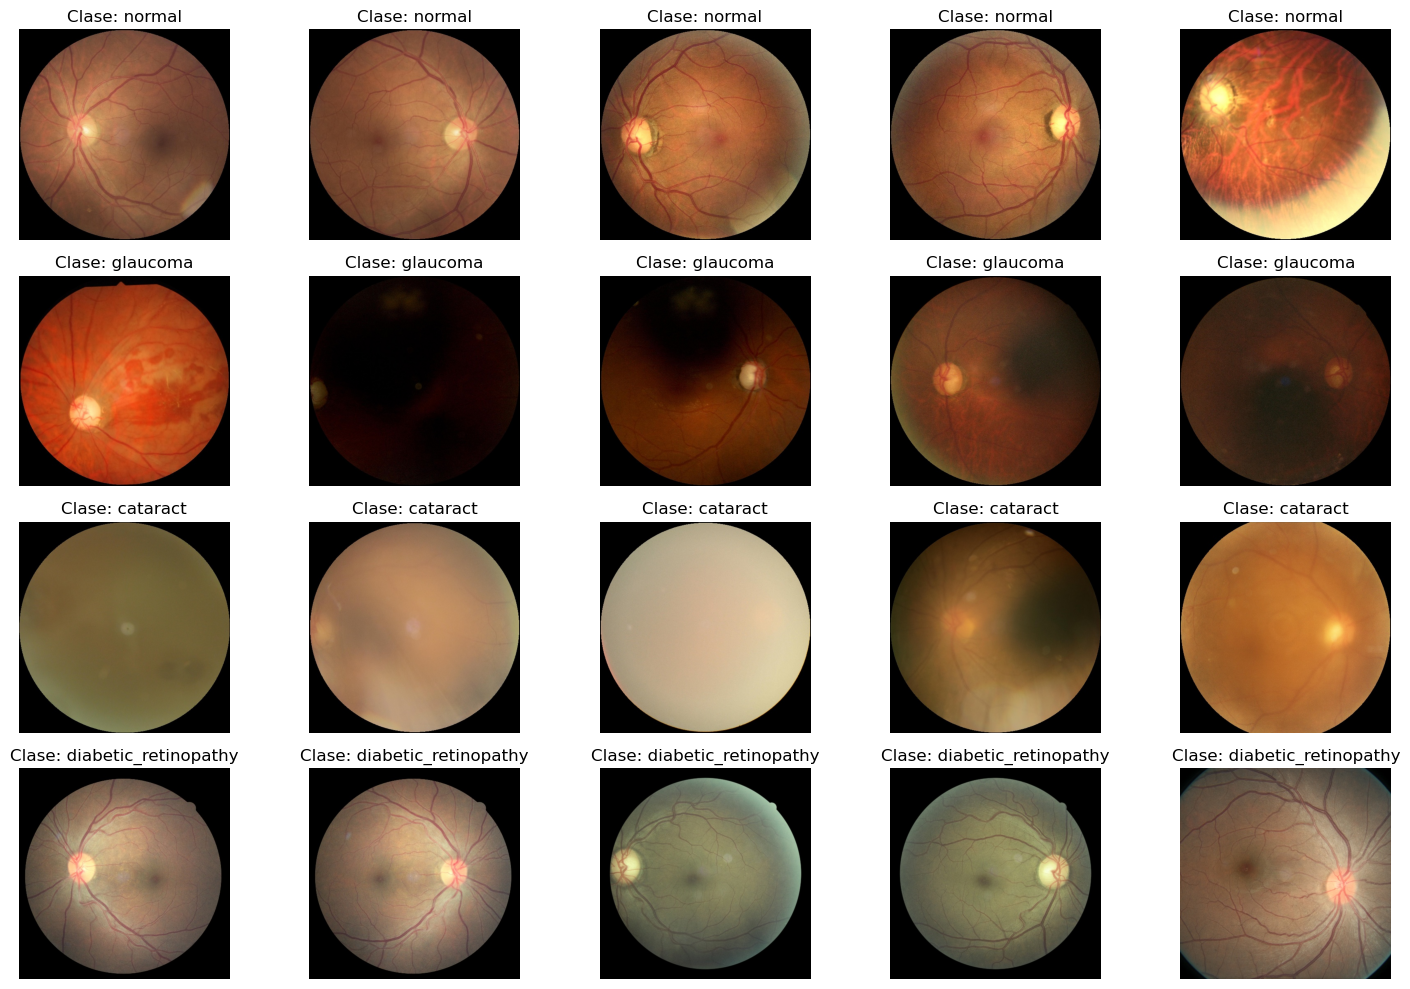

In [7]:
# Para cargar las imágenes
def cargar_imagenes(data_dir):

    # Lista para almacenar las imágenes y sus etiquetas
    imagenes = []
    etiquetas = []

    # Iterar sobre cada clase
    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_folder)
        # Listar las imágenes en la carpeta de la clase actual
        image_files = os.listdir(class_path)
        # Iterar sobre cada imagen en la carpeta de la clase actual
        for image_file in image_files:
            # Ruta de la imagen actual
            image_path = os.path.join(class_path, image_file)
            # Leer la imagen y agregarla a la lista de imágenes
            img = cv2.imread(image_path)
            imagenes.append(img)
            # Agregar la etiqueta de la clase a la lista de etiquetas
            etiquetas.append(class_folder)

    return imagenes, etiquetas

# Para inspeccionar las imágenes
def inspeccionar_imagenes(imagenes, etiquetas):
   # Definir el número máximo de imágenes por etiqueta a mostrar, en este caso 5
    max_imagenes_por_etiqueta = 5

    # Mostrar hasta max_imagenes_por_etiqueta de cada clase
    fig, axes = plt.subplots(len(set(etiquetas)), max_imagenes_por_etiqueta, figsize=(15, 10))
    for i, clase in enumerate(set(etiquetas)):
        clase_indices = [j for j, etiqueta in enumerate(etiquetas) if etiqueta == clase]
        # Iterar sobre las primeras max_imagenes_por_etiqueta imágenes de la clase actual
        for j, indice in enumerate(clase_indices[:max_imagenes_por_etiqueta]):
            img = imagenes[indice]
            axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[i, j].set_title(f'Clase: {clase}')
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Directorio que contiene las imágenes de todas las clases
data_dir = '/content/dataset'

# Listar las carpetas de clases
class_folders = os.listdir(data_dir)

# Cargar las imágenes y sus etiquetas
imagenes, etiquetas = cargar_imagenes(data_dir)

# Inspeccionar las imágenes
inspeccionar_imagenes(imagenes, etiquetas)

In [8]:
# Distribución de clases (etiquetas)
class_distribution = {folder: len(os.listdir(os.path.join(data_dir, folder))) for folder in class_folders}
print("Distribución de clases:")
print(class_distribution)

Distribución de clases:
{'cataract': 1038, 'diabetic_retinopathy': 1098, 'glaucoma': 1007, 'normal': 1074}


In [9]:
# Tamaño de las imágenes
image_sizes = []
for folder in class_folders:
    images = os.listdir(os.path.join(data_dir, folder))
    for image in images:
        img_path = os.path.join(data_dir, folder, image)
        img = cv2.imread(img_path)
        image_sizes.append(img.shape[:2])
image_sizes = np.array(image_sizes)
print("Tamaño mínimo de imagen:", np.min(image_sizes, axis=0))
print("Tamaño máximo de imagen:", np.max(image_sizes, axis=0))

Tamaño mínimo de imagen: [256 256]
Tamaño máximo de imagen: [1728 2592]


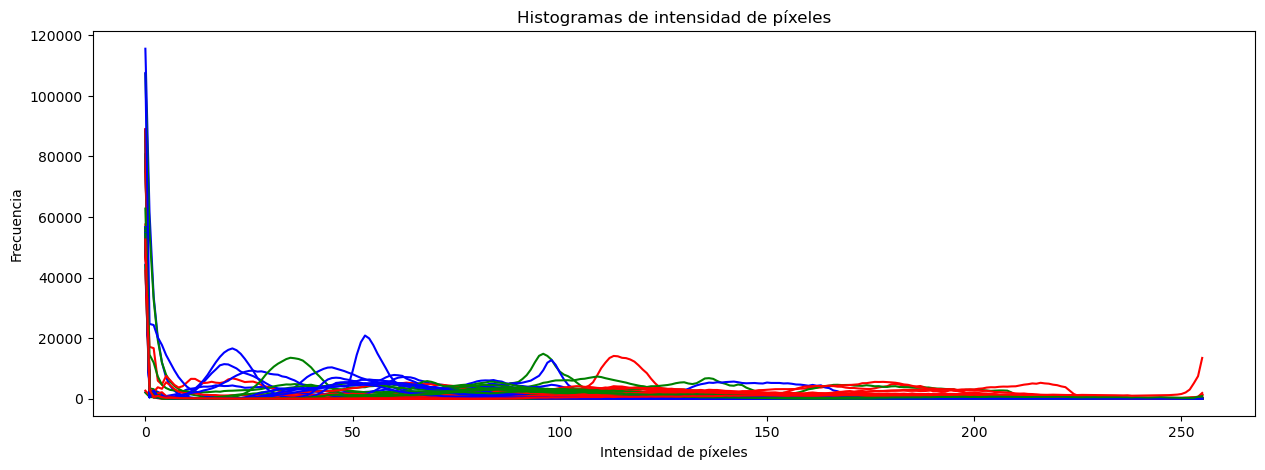

In [10]:
# Histogramas de intensidad de píxeles
plt.figure(figsize=(15, 5))
for i, folder in enumerate(class_folders):
    images = os.listdir(os.path.join(data_dir, folder))
    for image in images[:5]:
        img_path = os.path.join(data_dir, folder, image)
        img = cv2.imread(img_path)
        for j, color in enumerate(['b', 'g', 'r']):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
plt.title('Histogramas de intensidad de píxeles')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Reescalamiento de las imágenes

nuevo_tamano = (128, 128)  # 128x128 píxeles

# Iterar sobre cada clase
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    # Listar las imágenes en la carpeta de la clase actual
    image_files = os.listdir(class_path)
    # Iterar sobre cada imagen en la carpeta de la clase actual
    for image_file in image_files:
        # Ruta de la imagen actual
        image_path = os.path.join(class_path, image_file)
        # Leer la imagen
        img = cv2.imread(image_path)
        # Reescalar la imagen al nuevo tamaño
        img_reescalada = cv2.resize(img, nuevo_tamano)
        # Guardar la imagen reescalada
        cv2.imwrite(image_path, img_reescalada)


**Preprocesamiento y visualización de los datos**

In [12]:
import cv2
import os
import matplotlib.pyplot as plt

# Función para preprocesar (normalizar) una imagen - iluminación
def preprocesar_imagen(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_intensity = gray_img.mean()
    std_intensity = gray_img.std()
    alpha = 128 / std_intensity
    beta = 128 - alpha * mean_intensity
    img_preprocesada = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img_preprocesada

# Listas para almacenar las imágenes preprocesadas y sus etiquetas
imagenes_preprocesadas = []
etiquetas = []

# Directorio donde guardarás las imágenes preprocesadas
output_dir = '/content/datasetfinal'  # Reemplaza con la ruta donde guardarás las imágenes

os.makedirs(output_dir, exist_ok=True)

# Iterar sobre cada clase
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    output_class_path = os.path.join(output_dir, class_folder)

    # Crear la carpeta de salida si no existe
    os.makedirs(output_class_path, exist_ok=True)

    # Listar las imágenes en la carpeta de la clase actual
    image_files = os.listdir(class_path)

    # Iterar sobre cada imagen en la carpeta actual
    for image_file in image_files:
        # Ruta de la imagen original
        original_image_path = os.path.join(class_path, image_file)
        # Leer la imagen original
        original_img = cv2.imread(original_image_path)
        # Preprocesar la imagen original
        original_img_preprocessed = preprocesar_imagen(original_img)

        # Guardar la imagen preprocesada en el directorio de salida
        output_image_path = os.path.join(output_class_path, image_file)
        cv2.imwrite(output_image_path, original_img_preprocessed)

        # Agregar la etiqueta de la clase a la lista de etiquetas
        etiquetas.append(class_folder)

        # Agregar la imagen preprocesada a la lista (opcional, dependiendo de tus necesidades)
        imagenes_preprocesadas.append(original_img_preprocessed)

plt.tight_layout()
plt.show()

print("Imágenes preprocesadas y guardadas en:", output_dir)

<Figure size 640x480 with 0 Axes>

Imágenes preprocesadas y guardadas en: /content/datasetfinal


In [13]:
import shutil
import os

# Ruta de la carpeta que deseas comprimir
folder_to_zip = '/content/datasetfinal'  # Reemplaza con tu ruta

# Ruta donde se guardará el archivo comprimido
zip_file = '/content/datasetfinal'  # Puedes cambiar la ruta y el nombre del archivo

# Comprimir la carpeta
shutil.make_archive(zip_file, 'zip', folder_to_zip)

'C:\\content\\datasetfinal.zip'

Para dividir en Entrenamiento y Validación

In [14]:
import os
import shutil
import random

# Directorio donde se encuentran las subcarpetas de clases
dataset_dir = '/content/dataset'

# Directorios de entrenamiento y validación
train_dir = '/content/train/'
val_dir = '/content/validation/'

# Crear directorios de entrenamiento y validación si no existen
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Lista de clases
classes = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Ratio de datos de validación
val_split = 0.2

# Iterar sobre las clases y copiar las imágenes
for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    files = os.listdir(cls_dir)
    random.shuffle(files)
    num_val = int(len(files) * val_split)

    # Copiar archivos de entrenamiento
    train_cls_dir = os.path.join(train_dir, cls)
    os.makedirs(train_cls_dir, exist_ok=True)
    for f in files[num_val:]:
        shutil.copy(os.path.join(cls_dir, f), os.path.join(train_cls_dir, f))

    # Copiar archivos de validación
    val_cls_dir = os.path.join(val_dir, cls)
    os.makedirs(val_cls_dir, exist_ok=True)
    for f in files[:num_val]:
        shutil.copy(os.path.join(cls_dir, f), os.path.join(val_cls_dir, f))

# CON YOLO

In [15]:
import requests

urls = [
    "https://pjreddie.com/media/files/yolov3.weights",
    "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg",
    "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"
]

for url in urls:
    filename = url.split("/")[-1]
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {filename}")

print("All files downloaded successfully.")


ConnectionError: HTTPSConnectionPool(host='pjreddie.com', port=443): Max retries exceeded with url: /media/files/yolov3.weights (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000141941ADE90>: Failed to resolve 'pjreddie.com' ([Errno 11001] getaddrinfo failed)"))

In [16]:
import os

for file in os.listdir():
    if file.endswith(".weights") or file.endswith(".cfg") or file.endswith(".names"):
        print(file)


coco.names
yolov3.cfg
yolov3.weights


In [17]:
import cv2
import numpy as np

# Cargar YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()

# Ajustar la obtención de capas de salida
try:
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
except TypeError:
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

def detect_objects_yolo(img):
    height, width, channels = img.shape
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img

In [18]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Directorio que contiene las imágenes de todas las clases
data_dir = '/content/dataset'

# Tamaño deseado para las imágenes de entrada de la red convolucional
img_height, img_width = 150, 150
batch_size = 32

# Preparar los datos utilizando ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Separar el 20% de los datos para validación
)

In [20]:
# Función para procesar las imágenes del dataset y aplicar YOLO
def process_images_and_generate_data(datagen, data_dir, img_height, img_width, batch_size):
    # Crear generador de datos para todo el dataset
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  # Importante mantener el orden
    )

    # Lista para almacenar las imágenes procesadas y sus etiquetas
    processed_images = []
    labels = []

    # Iterar sobre cada imagen en el generador
    for i in range(len(generator)):
        batch_images, batch_labels = generator[i]

        # Iterar sobre cada imagen en el lote
        for j in range(len(batch_images)):
            image = batch_images[j]
            label = batch_labels[j]

            # Aplicar YOLO a la imagen
            processed_image = detect_objects_yolo(image)
            processed_images.append(processed_image)
            labels.append(label)

    return np.array(processed_images), np.array(labels)

# Obtener las imágenes procesadas y sus etiquetas
processed_images, labels = process_images_and_generate_data(datagen, data_dir, img_height, img_width, batch_size)

# Verificar las dimensiones
print(f"Dimensiones de las imágenes procesadas: {processed_images.shape}")
print(f"Dimensiones de las etiquetas: {labels.shape}")

Found 4217 images belonging to 4 classes.
Dimensiones de las imágenes procesadas: (4217, 150, 150, 3)
Dimensiones de las etiquetas: (4217, 4)


In [ ]:
# Cargar YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Guardar el modelo YOLO como un archivo .h5
net.save("eye_disease_classifier_yolo.h5")

# CON CNN:

In [46]:
# Dividir en conjunto de entrenamiento y validación
split_index = int(len(processed_images) * 0.8)
train_images = processed_images[:split_index]
train_labels = labels[:split_index]
val_images = processed_images[split_index:]
val_labels = labels[split_index:]

# Crear un generador de datos a partir de los arrays numpy
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)
validation_generator = val_datagen.flow(val_images, val_labels, batch_size=batch_size)

In [47]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Definición del modelo CNN
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'), 
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 clases: cataract, diabetic_retinopathy, glaucoma, normal
])

In [71]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)


In [72]:
epochs = 100 
# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(val_images) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 107s 892ms/step - accuracy: 0.7574 - loss: 0.6724 - val_accuracy: 0.0168 - val_loss: 2.2649
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.5343 - val_accuracy: 0.0833 - val_loss: 2.3726
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 84s 794ms/step - accuracy: 0.7970 - loss: 0.5867 - val_accuracy: 0.0228 - val_loss: 2.3721
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.5874 - val_accuracy: 0.0000e+00 - val_loss: 2.1122
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 80s 756ms/step - accuracy: 0.7903 - loss: 0.5534 - val_accuracy: 0.0649 - val_loss: 2.0619
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.5134 - val_accuracy: 0.0833 - val_loss: 1.7957
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 80s 757ms/step - accuracy: 0.8022 - loss: 0.5329 - val_accuracy: 0.0204 - val_loss: 2.1434
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 

In [73]:
# Evaluación del modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Guardar el modelo
model.save('eye_disease_classifier_cnn.h5')

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.3217 - loss: 1.6412


Loss: 1.6463102102279663
Accuracy: 0.3234597146511078


Visualización del rendimiento del modelo

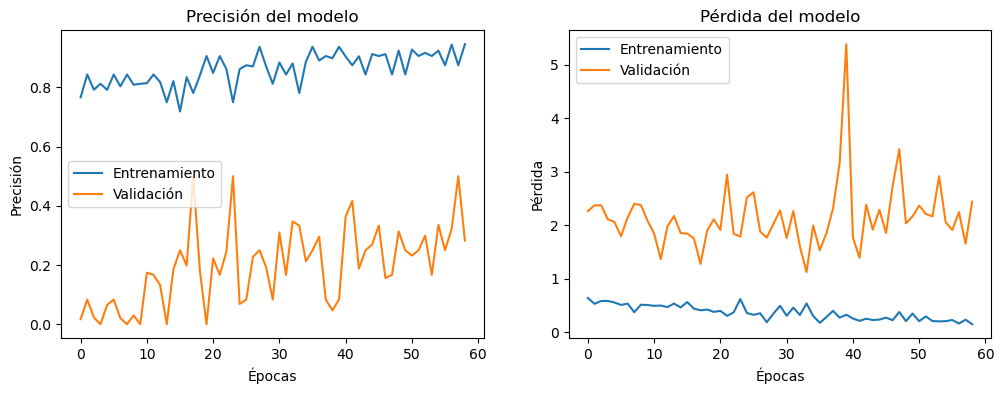

In [77]:
import matplotlib.pyplot as plt

# Visualizar el rendimiento del modelo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

**Matriz de confusión**:  permite ver en detalle cómo se están clasificando las diferentes clases

In [82]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predicciones en el conjunto de validación
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Etiquetas verdaderas
y_true = validation_generator.labels

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print('Matriz de Confusión')
print(cm)

# Informe de clasificación
target_names = list(validation_generator.class_indices.keys())
print('Informe de Clasificación')
print(classification_report(y_true, y_pred, target_names=target_names))


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step


AttributeError: 'NumpyArrayIterator' object has no attribute 'labels'

Para ponerlo en prueba

In [79]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

# Cargar el modelo
model = load_model('eye_disease_classifier_cnn.h5')

# Configurar las dimensiones de la imagen4
img_width, img_height = 150, 150

# Ruta de la imagen de prueba
img_path = '/content/dataset/glaucoma/Glaucoma_087.png'

# Cargar la imagen y preprocesarla
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar la imagen

# Hacer la predicción
predictions = model.predict(img_array)

# Definir las etiquetas de las clases
class_labels = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Obtener la clase con mayor probabilidad
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

print("Clase predicha:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
Clase predicha: glaucoma


- El modelo de transfer learning tiene una baja precisión y alta pérdida, lo que indica que se necesita ajustes adicionales o más datos para mejorar su rendimiento.

- El modelo de CNN personalizado muestra una precisión mucho más alta y una pérdida menor, lo cual es positivo y sugiere que este modelo podría estar mejor adaptado a los datos específicos o haber sido entrenado más eficazmente.